# rates for inverse lepton decay $\bar{\nu}_e + e^- \to \ell^- \bar{\nu_\ell}$

In [1]:
from muon_collider_mc import *

import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

from matplotlib.pylab import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [7]:
numu_flux_10TeV = np.genfromtxt("data/numu_energy_flux_MeV_SqrtS-10TeV_1e19nu.txt")
nue_flux_10TeV = np.genfromtxt("data/nuebar_energy_flux_MeV_SqrtS-10TeV_1e19nu.txt")

# renormalize to 2e18
nue_flux_10TeV[:,1] *= 1/5
numu_flux_10TeV[:,1] *= 1/5

print(np.sum(nue_flux_10TeV[:,1]))
print(np.sum(numu_flux_10TeV[:,1]))

2.0000000000000003e+18
2.0000000000000003e+18


In [4]:
N_SAMPLES = 10000

# sqrt(s) = 10 TeV
eves_gen_nuebar_10TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_10TeV, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=20.0, ssw_running=True, energy_only_flux=True)
eves_gen_numu_10TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_10TeV, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=20.0, ssw_running=True, energy_only_flux=True)
eves_gen_nuebar_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numu_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nuebar_energies_10TeV, _, _, nuebar_wgts_10TeV = eves_gen_nuebar_10TeV.get_energy_theta_phi_wgt_arrays()
numu_energies_10TeV, _, _, numu_wgts_10TeV = eves_gen_numu_10TeV.get_energy_theta_phi_wgt_arrays()

eves_gen_nue_10TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_10TeV, flavor="e", detector_material=Material("Ar"),
                                    detector_length=20.0, ssw_running=True, energy_only_flux=True)
eves_gen_numubar_10TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_10TeV, flavor="mubar", detector_material=Material("Ar"),
                                    detector_length=20.0, ssw_running=True, energy_only_flux=True)
eves_gen_nue_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numubar_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nue_energies_10TeV, _, _, nue_wgts_10TeV = eves_gen_nue_10TeV.get_energy_theta_phi_wgt_arrays()
numubar_energies_10TeV, _, _, numubar_wgts_10TeV = eves_gen_numubar_10TeV.get_energy_theta_phi_wgt_arrays()

In [5]:
flux_ild = InverseLeptonDecayFromFlux(nue_flux_10TeV, flavor="ebar", energy_only_flux=True)

flux_ild.simulate_ild_rectangle_rule(mlepton=M_MU, n_samples=N_SAMPLES)

ild_muon_energies = np.array(flux_ild.el_energies)
ild_muon_weights = np.array(flux_ild.el_weights)


flux_ild.simulate_ild_rectangle_rule(mlepton=M_TAU, n_samples=N_SAMPLES)

ild_tau_energies = np.array(flux_ild.el_energies)
ild_tau_weights = np.array(flux_ild.el_weights)

In [6]:
print("No. taus = ", np.sum(ild_tau_weights))
print("No. mu = ", np.sum(ild_muon_weights))

No. taus =  53462.07883417816
No. mu =  6459733.371496151


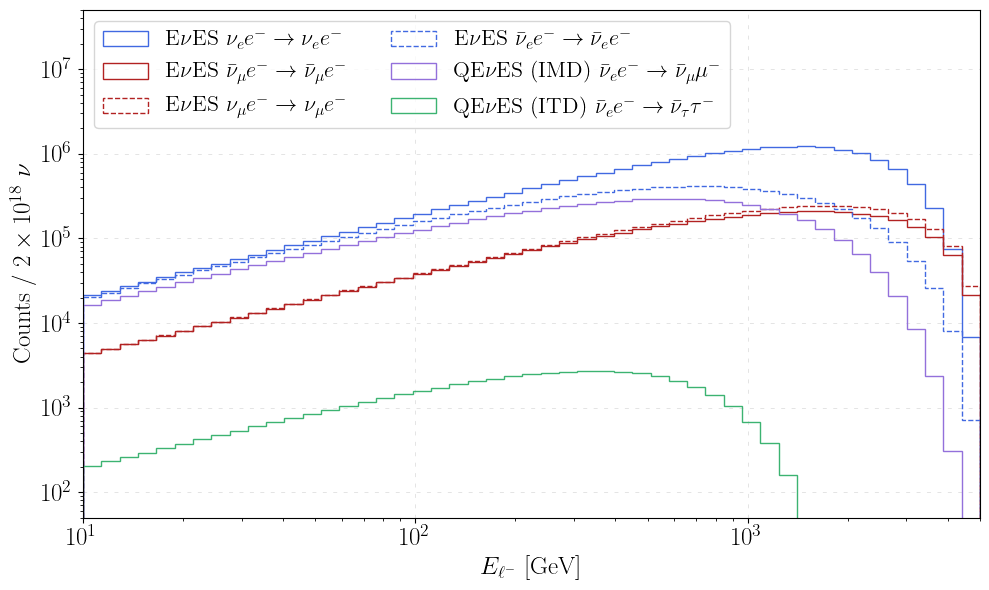

In [12]:
bins = np.logspace(1, np.log10(5e3), 50)

fig, ax = plt.subplots(figsize=(10, 6))

# EvEs
ax.hist(1e-3*nue_energies_10TeV, weights=nue_wgts_10TeV, bins=bins, histtype="step",
         label=r"E$\nu$ES $\nu_e e^- \to \nu_e e^-$", color='royalblue')
ax.hist(1e-3*numubar_energies_10TeV, weights=numubar_wgts_10TeV, bins=bins, histtype="step",
         label=r"E$\nu$ES $\bar{\nu}_\mu e^- \to \bar{\nu}_\mu e^-$", color='firebrick')

ax.hist(1e-3*numu_energies_10TeV, weights=numu_wgts_10TeV, bins=bins, histtype="step",
         label=r"E$\nu$ES $\nu_\mu e^- \to \nu_\mu e^-$", color='firebrick', linestyle='dashed')
ax.hist(1e-3*nuebar_energies_10TeV, weights=nuebar_wgts_10TeV, bins=bins, histtype="step",
         label=r"E$\nu$ES $\bar{\nu}_e e^- \to \bar{\nu}_e e^-$", color='royalblue', linestyle='dashed')

# plot tau and mu inv decay
ax.hist(1e-3*ild_muon_energies, weights=ild_muon_weights, bins=bins, histtype="step",
         label=r"QE$\nu$ES (IMD) $\bar{\nu}_e e^- \to \bar{\nu}_\mu \mu^-$", color='mediumpurple')
ax.hist(1e-3*ild_tau_energies, weights=ild_tau_weights, bins=bins, histtype="step",
         label=r"QE$\nu$ES (ITD) $\bar{\nu}_e e^- \to \bar{\nu}_\tau \tau^-$", color='mediumseagreen')


# set the grid
ax.grid(True, linestyle='-', linewidth=0.5, alpha=0.3, color='gray', dashes=(5,10))
for line in plt.gca().xaxis.get_gridlines():
    line.set_dash_capstyle('round')
for line in plt.gca().yaxis.get_gridlines():
    line.set_dash_capstyle('round')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax.set_ylim((50, 5e7))

ax.set_yscale("log")
ax.set_xscale('log')
ax.set_xlim((bins[0], bins[-1]))
ax.set_xlabel(r"$E_{\ell^-}$ [GeV]", fontsize=18)
ax.set_ylabel(r"Counts / $2 \times 10^{18}$ $\nu$", fontsize=18)

plt.legend(fontsize=16, loc="upper left", ncol=2)
plt.tight_layout()
plt.savefig("plots/spectra/eves_and_ILD_spectra_10TeV.pdf")
plt.show()
